<a href="https://colab.research.google.com/github/salil82/Module-B-semester-2/blob/main/OMDS-ModB2-Week4-Deshpande-Salil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [3]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

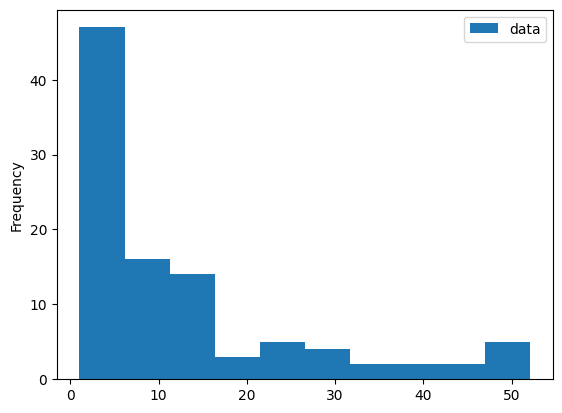

In [4]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

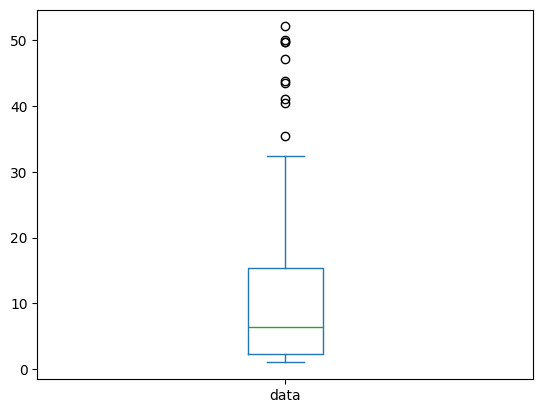

In [5]:
df.plot.box()

Histogram

Pros: Shows the shape of the full distribution and makes it easy to see counts or frequency in different price ranges (bins).

Cons: The number of bins and their width can greatly change or skew the visualization. Harder to see outliers as well as the median and interquartile range.

Boxplot

Pros: easier to see the median, interquartile range, and outliers.

Cons: hides distribution, less detailed frequency

 I would choose the boxplot because it explicitly shows the upper quartile and outliers. I would improve the boxplot by adding a title and labeling the y-axis as well as a labeling the 75th percentile. For the histogram, I would also add a title and label the x-axis. I might also experiment with different bin sizes.


# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [6]:
co2_df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/refs/heads/master/owid-co2-data.csv')
co2_df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


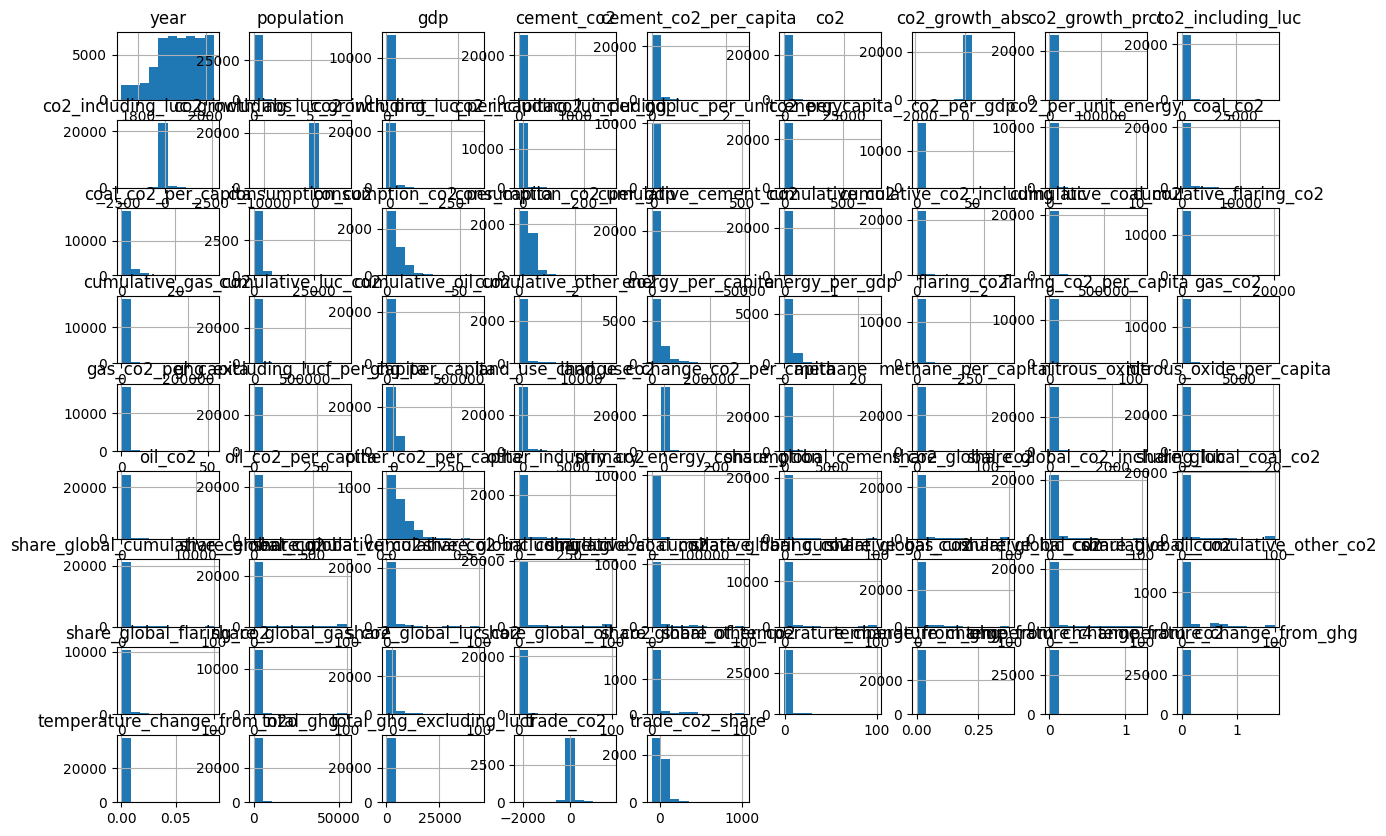

In [9]:
import matplotlib.pyplot as plt
co2_df.hist(figsize=(15, 10))
plt.show()

The above graphic showing the histograms of all columns is too crowded so I'm going to show select columns.

Generating histograms for: year, population, gdp, co2, cement_co2, trade_co2


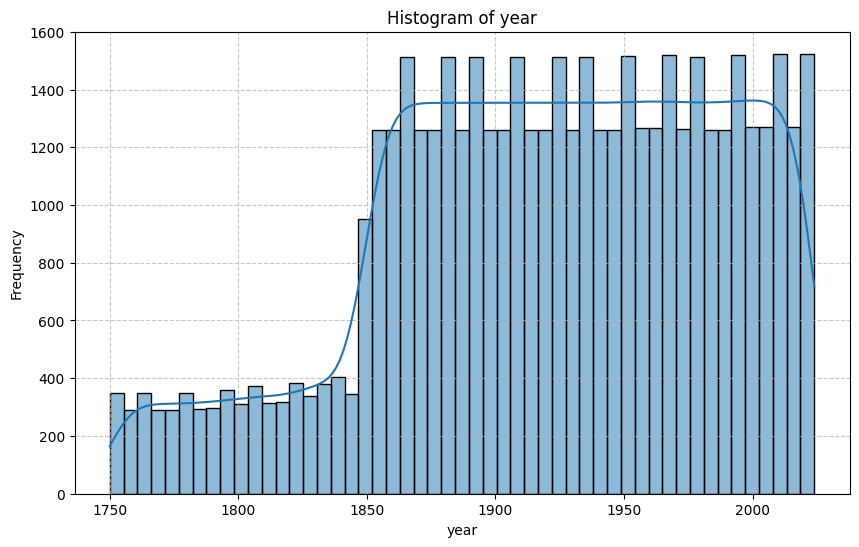

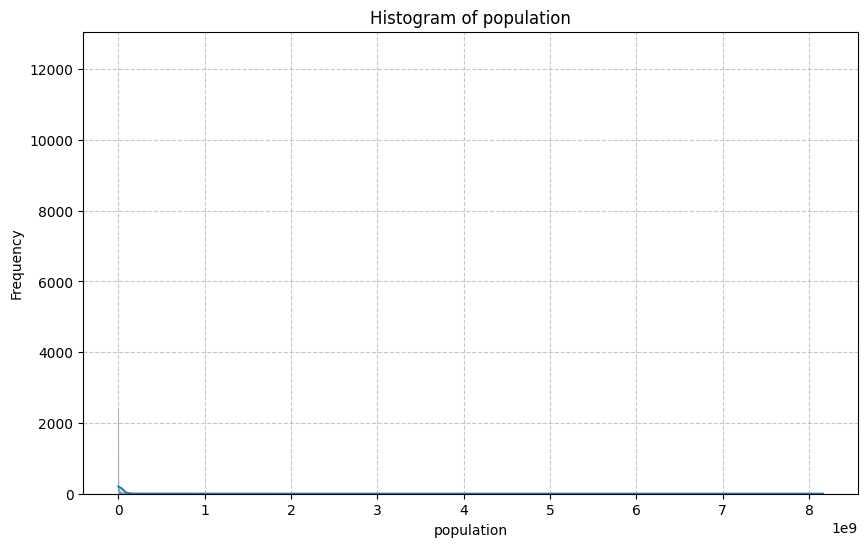

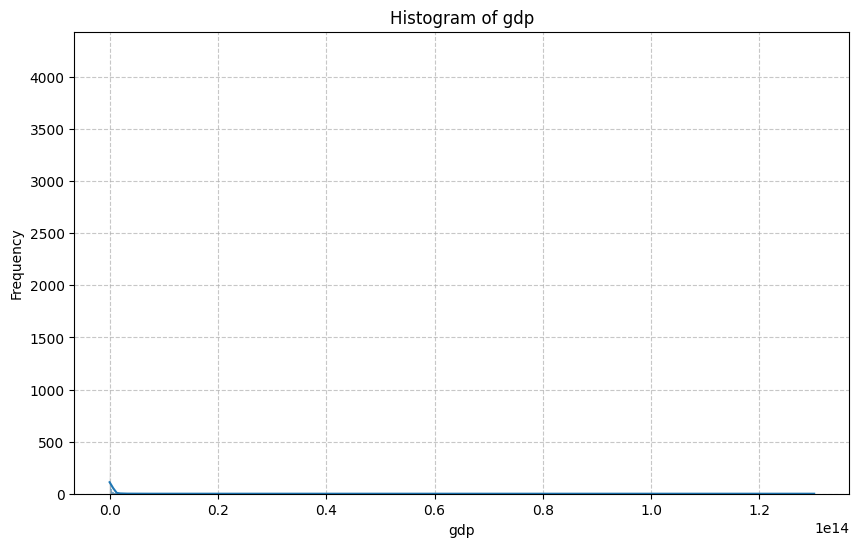

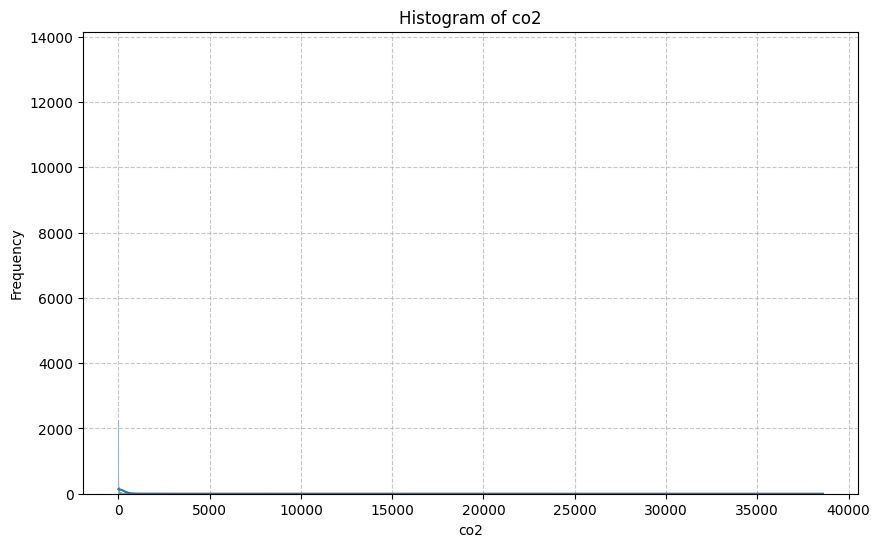

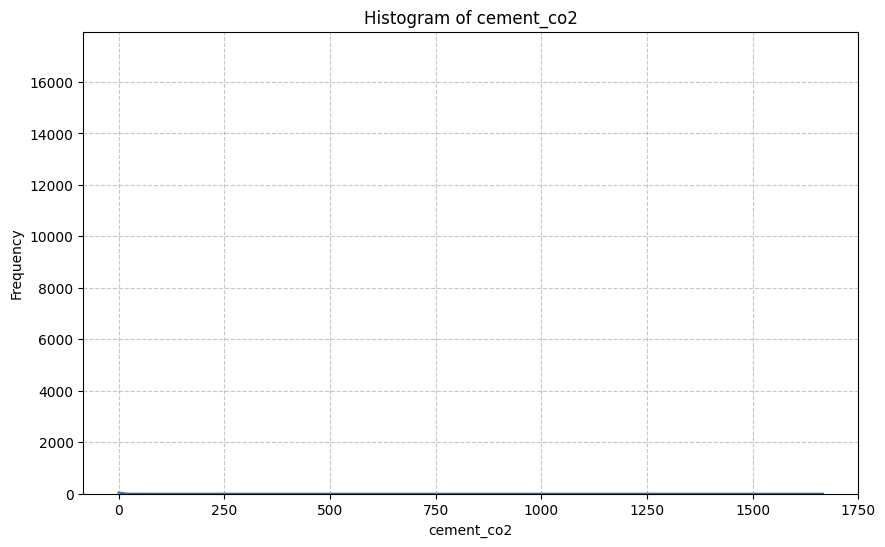

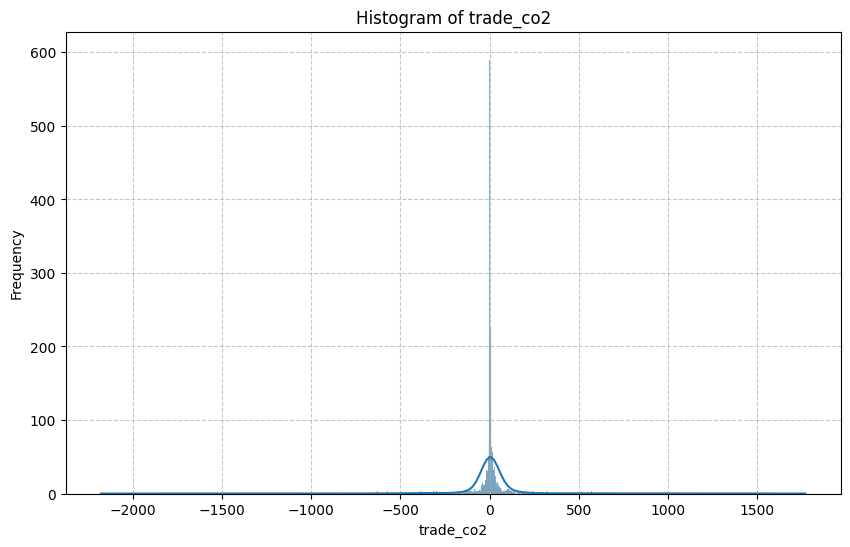

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns
numerical_cols = co2_df.select_dtypes(include=np.number).columns

# Limit to a few key numerical columns for demonstration, or all if there are not too many
# We'll pick a few interesting ones or the first few if none are specified
selected_cols = ['year', 'population', 'gdp', 'co2', 'cement_co2', 'trade_co2']

# Filter selected_cols to only include those present in the actual numerical_cols
plotting_cols = [col for col in selected_cols if col in numerical_cols]

# If no specific columns are provided or found, take the first few numerical columns
if not plotting_cols and len(numerical_cols) > 0:
    plotting_cols = numerical_cols[:5] # Take first 5 numerical columns
elif not plotting_cols and len(numerical_cols) == 0:
    print("No numerical columns found to plot histograms.")

print(f"Generating histograms for: {', '.join(plotting_cols)}")

for col in plotting_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(co2_df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [14]:
print("Checking for null values in selected plotting columns:\n")

null_counts = co2_df[plotting_cols].isnull().sum()
null_percentages = (co2_df[plotting_cols].isnull().sum() / len(co2_df)) * 100

null_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percentages
})

print(null_info.round(2))

Checking for null values in selected plotting columns:

            Null Count  Null Percentage (%)
year                 0                 0.00
population        9244                18.34
gdp              35160                69.75
co2              21027                41.71
cement_co2       21238                42.13
trade_co2        45699                90.65


In [15]:
skewed_cols = ['population', 'gdp', 'co2', 'cement_co2', 'trade_co2']

for col in skewed_cols:
    # Apply log1p transformation, which handles 0s by computing log(1+x)
    # .fillna(0) is used before log1p to ensure NaNs are treated as 0 for transformation,
    # but we will keep NaNs as NaNs in the log transformed columns for now,
    # as they represent missing original data.
    # Using .dropna() then apply log1p will result in different length series
    # So we apply log1p directly, which will return NaN for original NaN values
    co2_df[f'{col}_log'] = np.log1p(co2_df[col])

print("Original and log-transformed columns for skewed data:")
print(co2_df[['population', 'population_log', 'gdp', 'gdp_log', 'co2', 'co2_log',
             'cement_co2', 'cement_co2_log', 'trade_co2', 'trade_co2_log']].head())

Original and log-transformed columns for skewed data:
   population  population_log  gdp  gdp_log  co2  co2_log  cement_co2  \
0   2802560.0       14.846044  NaN      NaN  NaN      NaN         0.0   
1         NaN             NaN  NaN      NaN  NaN      NaN         0.0   
2         NaN             NaN  NaN      NaN  NaN      NaN         0.0   
3         NaN             NaN  NaN      NaN  NaN      NaN         0.0   
4         NaN             NaN  NaN      NaN  NaN      NaN         0.0   

   cement_co2_log  trade_co2  trade_co2_log  
0             0.0        NaN            NaN  
1             0.0        NaN            NaN  
2             0.0        NaN            NaN  
3             0.0        NaN            NaN  
4             0.0        NaN            NaN  


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
skewed_cols = ['population', 'gdp', 'co2', 'cement_co2', 'trade_co2']

for col in skewed_cols:
    # Create a temporary series, setting any negative values to NaN.
    # This handles data anomalies where physical quantities might be recorded as negative,
    # which would cause issues with log transformation (log of zero or negative number).
    temp_series = co2_df[col].copy()
    temp_series[temp_series < 0] = np.nan

    # Apply log1p transformation to the cleaned series.
    # np.log1p handles 0 gracefully (log1p(0) = 0) and propagates NaNs correctly.
    co2_df[f'{col}_log'] = np.log1p(temp_series)

print("Original and log-transformed columns for skewed data:")
print(co2_df[['population', 'population_log', 'gdp', 'gdp_log', 'co2', 'co2_log',
             'cement_co2', 'cement_co2_log', 'trade_co2', 'trade_co2_log']].head())

Original and log-transformed columns for skewed data:
   population  population_log  gdp  gdp_log  co2  co2_log  cement_co2  \
0   2802560.0       14.846044  NaN      NaN  NaN      NaN         0.0   
1         NaN             NaN  NaN      NaN  NaN      NaN         0.0   
2         NaN             NaN  NaN      NaN  NaN      NaN         0.0   
3         NaN             NaN  NaN      NaN  NaN      NaN         0.0   
4         NaN             NaN  NaN      NaN  NaN      NaN         0.0   

   cement_co2_log  trade_co2  trade_co2_log  
0             0.0        NaN            NaN  
1             0.0        NaN            NaN  
2             0.0        NaN            NaN  
3             0.0        NaN            NaN  
4             0.0        NaN            NaN  


Generating histograms for: year, population_log, gdp_log, co2_log, cement_co2_log, trade_co2_log


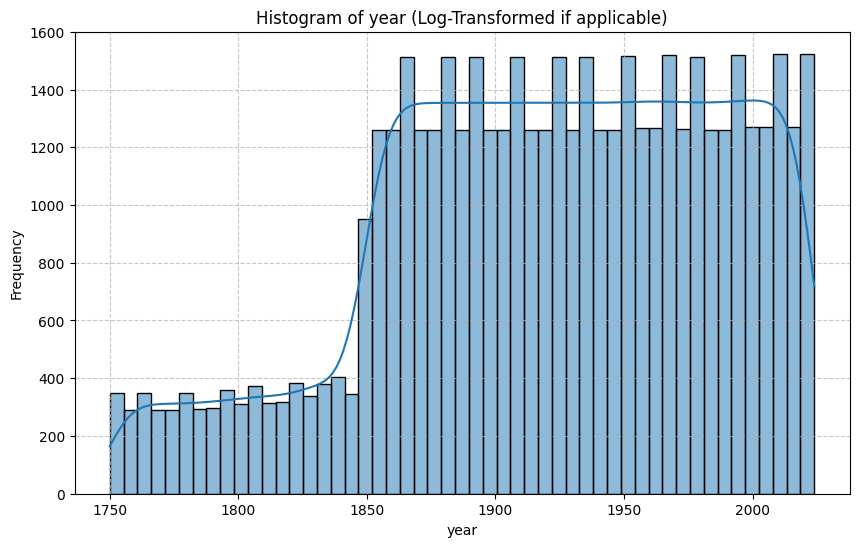

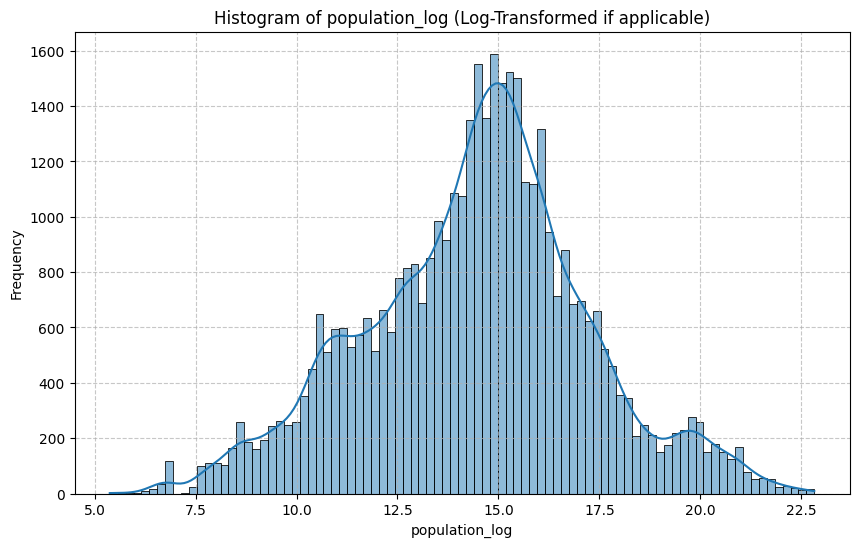

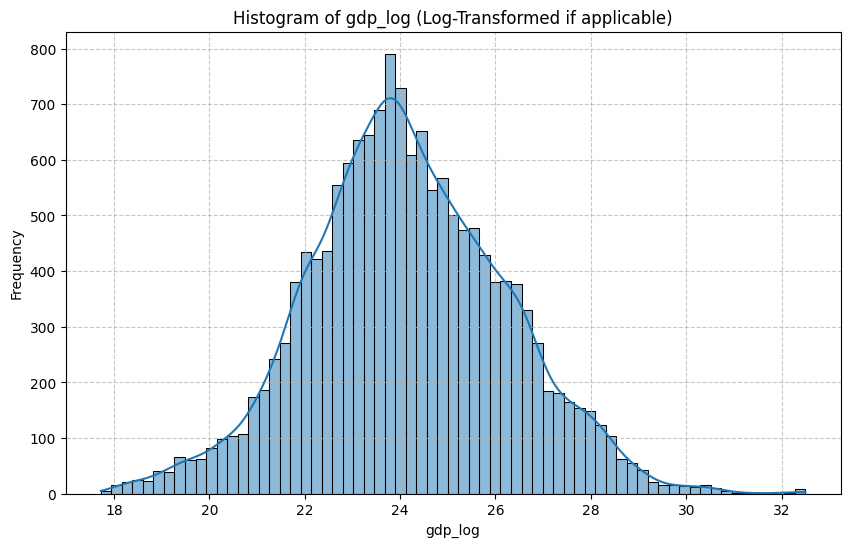

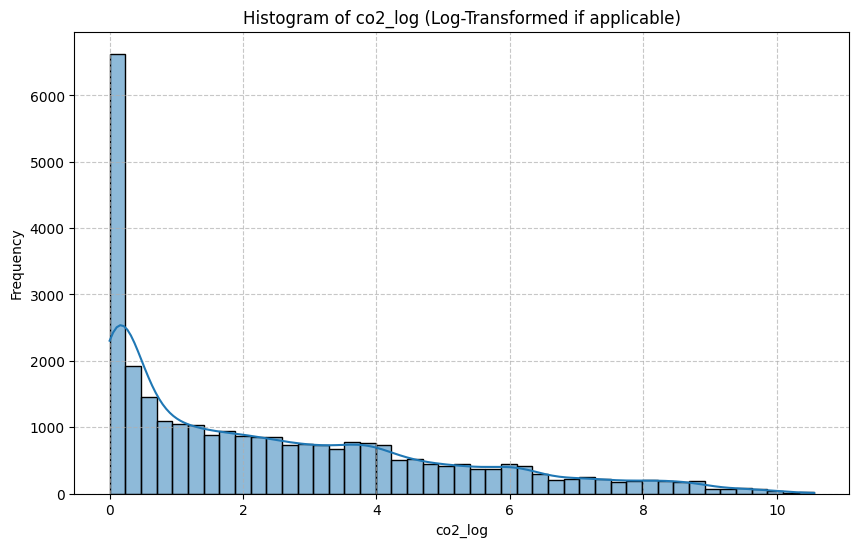

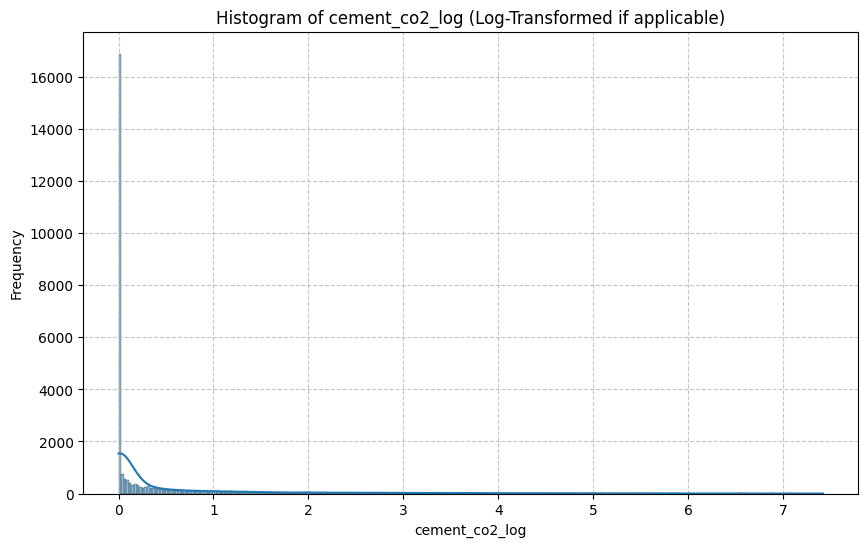

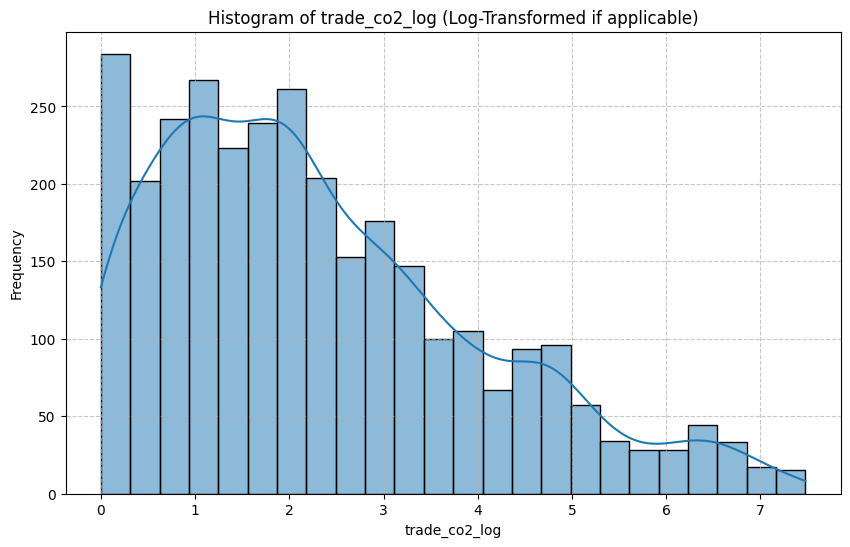

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to plot histograms for, including 'year' and the log-transformed columns
plot_transformed_cols = ['year'] + [f'{col}_log' for col in skewed_cols]

print(f"Generating histograms for: {', '.join(plot_transformed_cols)}")

for col in plot_transformed_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(co2_df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col} (Log-Transformed if applicable)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Data Usability
The data is partially usable, but significant portions require further processing due to missing values. There were a very high percentages of null values in several key columns:

trade_co2: Over 90% nulls.
gdp: Nearly 70% nulls.
cement_co2 and co2: Over 40% nulls each.
population: Around 18% nulls.

Overall Shape of the Distribution
For the numerical columns, we observed distinct distribution shapes:

year: generally uniform distribution

population, gdp, co2, cement_co2, trade_co2 (Original): These columns exhibited strong positive skewness.

population_log, gdp_log, co2_log, cement_co2_log, trade_co2_log (Log-Transformed): After applying the log transformation (np.log1p), the distributions of these columns became much more symmetrical and closer to a normal (bell-shaped) distribution. This transformation successfully mitigated the extreme positive skewness.

Outliers
Yes, outliers are present, particularly in the highly skewed original numerical columns (population, gdp, co2, cement_co2, trade_co2).

In original data: The initial histograms clearly showed very long tails, indicating the presence of extremely high values that are far from the majority of the data. These are typically countries or years with exceptionally high population, GDP, or CO2 emissions compared to the rest of the world or other historical periods.

Impact of log transformation: While log transformation doesn't remove outliers, it effectively reduces their magnitude relative to the rest of the data. By compressing the larger values, it makes the overall distribution more manageable and can reduce the undue influence of extreme outliers in certain types of analyses. However, they are still identifiable in the log-transformed plots as values far from the central mass.

In summary, the data is rich but requires careful handling, especially concerning missing values and the inherent skewness of many economic and environmental indicators. The log transformation was a crucial step to make the distributions more amenable to common analysis.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

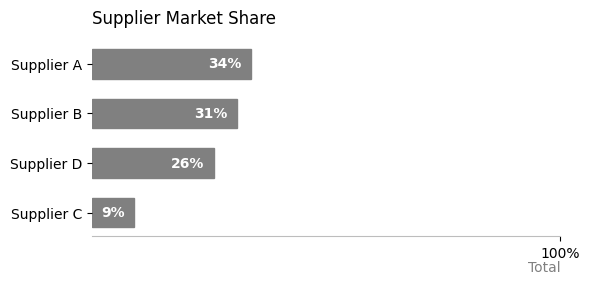

In [3]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["Supplier A", "Supplier B", "Supplier D", "Supplier C"]
percent = np.array([34, 31, 26, 9])

fig, ax = plt.subplots(figsize=(6, 3))
y = np.arange(len(labels))

# Draw bars
ax.barh(y, percent, color="gray", edgecolor="gray", height=0.6)

# Labels and layout
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlim(0, 100)
ax.set_xticks([100])
ax.set_xticklabels(["100%"])
ax.spines[['top','right','left']].set_visible(False)
ax.spines['bottom'].set_color('#bdbdbd')
ax.set_title("Supplier Market Share", loc='left', fontsize=12, pad=12)

# Percentage labels inside bars
for i, val in enumerate(percent):
    ax.text(val - 2, i, f"{val}%", va='center', ha='right', color='white', fontsize=10, fontweight='bold')

# "Total" label near baseline
ax.text(100, len(labels) - 0.5 + 0.6, "Total", va='center', ha='right', color='gray') # Modified line

plt.tight_layout()
plt.show()